In [1]:
!pip install mlxtend

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.frequent_patterns import association_rules,apriori
from mlxtend.preprocessing import TransactionEncoder
import warnings
warnings.filterwarnings('ignore')

In [3]:
df= pd.read_excel('Online retail.xlsx')
df.head()

,"shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil"
0,"burgers,meatballs,eggs"
1,chutney
2,"turkey,avocado"
3,"mineral water,milk,energy bar,whole wheat rice..."
4,low fat yogurt


In [4]:
df.shape

(7500, 1)

In [5]:
df['Transaction']= df.iloc[:,0].apply(lambda x: x.split(','))   # splitting column into list of items per transaction
df= df[['Transaction']]

In [6]:
df.duplicated().sum()  # duplicated identified

2325

In [7]:
df= df.drop_duplicates().reset_index(drop=True)   # duplicates removed
df.duplicated().sum()

0

In [8]:
df.head()

,Transaction
0,"[burgers, meatballs, eggs]"
1,[chutney]
2,"[turkey, avocado]"
3,"[mineral water, milk, energy bar, whole wheat ..."
4,[low fat yogurt]


In [9]:
df.shape

(5175, 1)

In [10]:
te= TransactionEncoder()   # converting transaction data into format suitable for Apriori
te_ary= te.fit(df['Transaction']).transform(df['Transaction'])
df_encoded= pd.DataFrame(te_ary,columns=te.columns_)

In [11]:
# Apriori algorith applying
frequent_itemsets= apriori(df_encoded,min_support=0.05,use_colnames=True)

In [12]:
# association rules generation 
rules= association_rules(frequent_itemsets,metric='confidence',min_threshold=0.3) 
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(chocolate),(mineral water),0.205217,0.299710,0.073237,0.356874,1.190730,1.0,0.011731,1.088884,0.201538,0.169651,0.081629,0.300616
1,(eggs),(mineral water),0.208116,0.299710,0.070145,0.337047,1.124578,1.0,0.007770,1.056320,0.139891,0.160265,0.053317,0.285545
2,(frozen vegetables),(mineral water),0.129855,0.299710,0.050435,0.388393,1.295895,1.0,0.011516,1.144999,0.262407,0.133028,0.126637,0.278336
3,(ground beef),(mineral water),0.135845,0.299710,0.058744,0.432432,1.442835,1.0,0.018030,1.233844,0.355168,0.155897,0.189525,0.314218
4,(ground beef),(spaghetti),0.135845,0.229565,0.055845,0.411095,1.790756,1.0,0.024660,1.308250,0.510993,0.180400,0.235620,0.327181


In [13]:
strong_rules= rules[rules['lift']>=1.2]     # strong associations
print(strong_rules.sort_values(by='lift',ascending=False).head(10))

           antecedents      consequents  antecedent support  \
4        (ground beef)      (spaghetti)            0.135845   
3        (ground beef)  (mineral water)            0.135845   
5               (milk)  (mineral water)            0.170048   
2  (frozen vegetables)  (mineral water)            0.129855   
6          (spaghetti)  (mineral water)            0.229565   

   consequent support   support  confidence      lift  representativity  \
4            0.229565  0.055845    0.411095  1.790756               1.0   
3            0.299710  0.058744    0.432432  1.442835               1.0   
5            0.299710  0.067826    0.398864  1.330831               1.0   
2            0.299710  0.050435    0.388393  1.295895               1.0   
6            0.299710  0.085024    0.370370  1.235762               1.0   

   leverage  conviction  zhangs_metric   jaccard  certainty  kulczynski  
4  0.024660    1.308250       0.510993  0.180400   0.235620    0.327181  
3  0.018030    1.23384

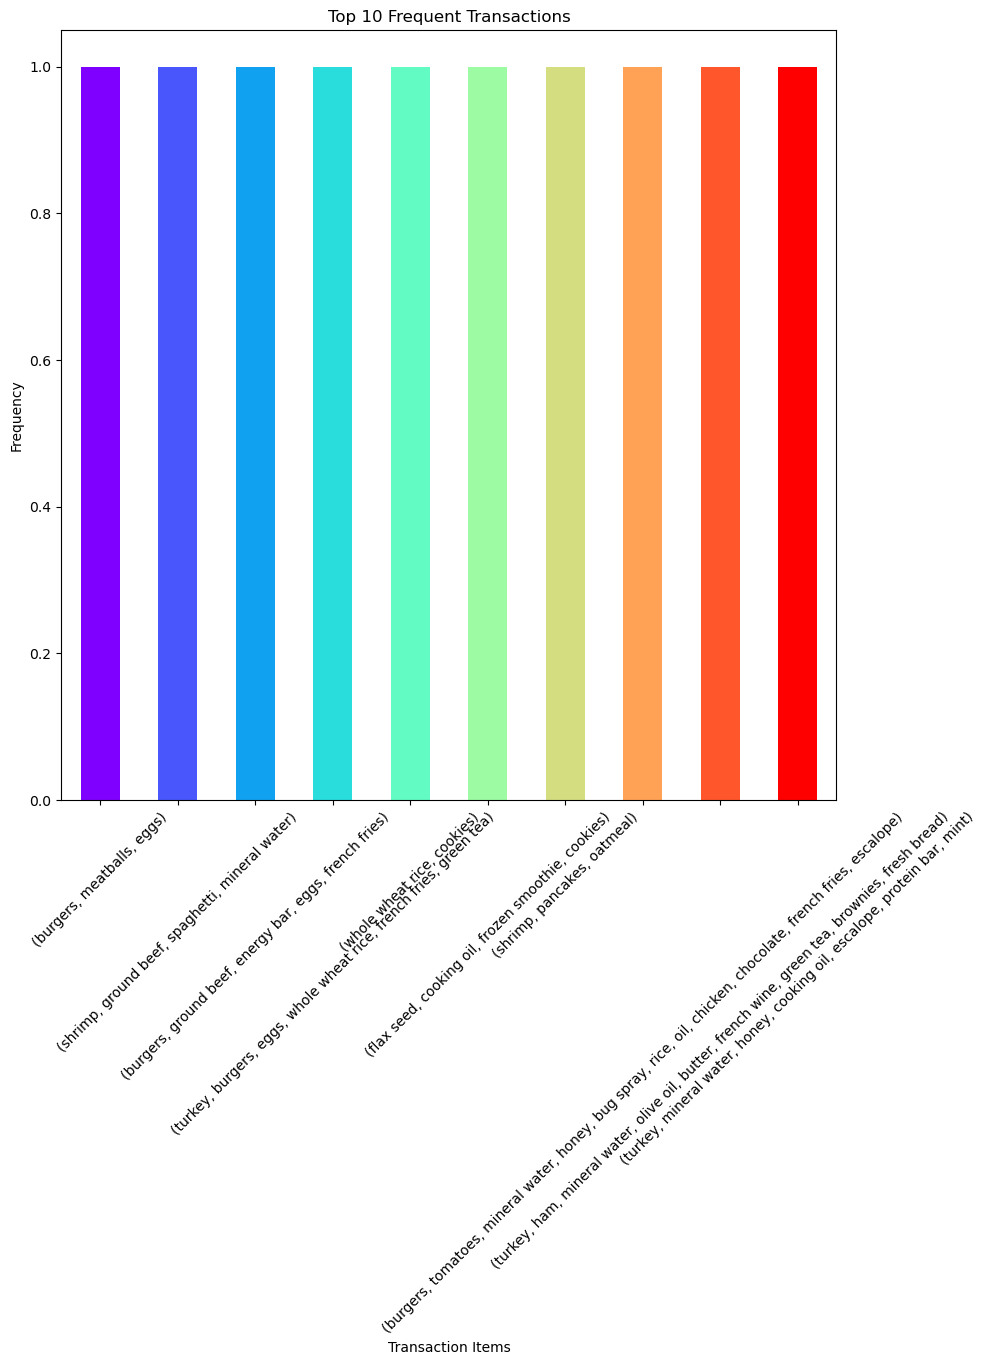

In [14]:
# plotting to 10 items
plt.figure(figsize=(10,10))
color= plt.cm.rainbow(np.linspace(0,1,10))
df['Transaction_Tuple']= df['Transaction'].apply(tuple)
df['Transaction_Tuple'].value_counts().head(10).plot(kind='bar',color=color)
plt.xlabel('Transaction Items')
plt.ylabel('Frequency')
plt.title('Top 10 Frequent Transactions')
plt.xticks(rotation=45)
plt.show()

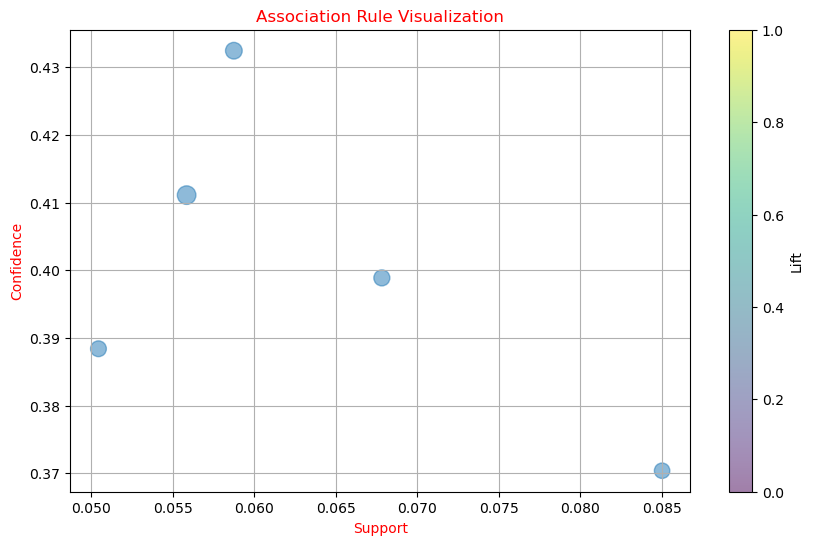

In [15]:
# Visualization Association strong rules using scatter plot
plt.figure(figsize=(10,6))
plt.scatter(strong_rules['support'],strong_rules['confidence'],s=strong_rules['lift']*100,alpha= 0.5)
plt.xlabel('Support',color='red')
plt.ylabel('Confidence',color='red')
plt.title('Association Rule Visualization',color='red')
plt.colorbar(label='Lift')
plt.grid(True)
plt.show()

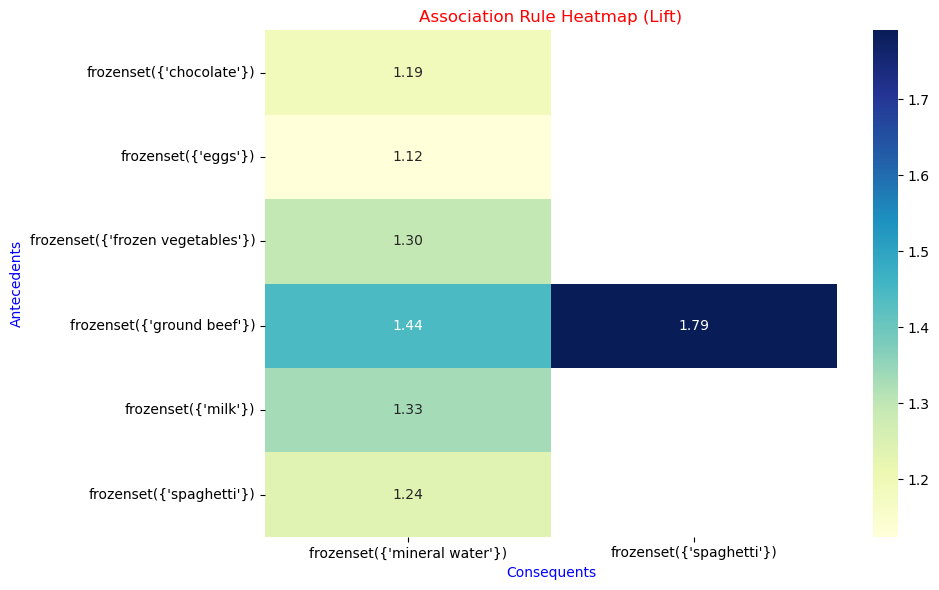

In [16]:
pivot_table = rules.pivot(index='antecedents', columns='consequents', values='lift')
plt.figure(figsize=(10, 6))   # heatmap visualization
sns.heatmap(pivot_table, annot=True, cmap='YlGnBu', fmt=".2f")
plt.title('Association Rule Heatmap (Lift)',color='red')
plt.xlabel('Consequents',color='blue')
plt.ylabel('Antecedents',color='blue')
plt.tight_layout()
plt.show()